In [11]:
from snn_stdp import SNN_STDP
from hwsnn.datasets.sequential_datasets import PoissonDataloader
from torch.utils.data import DataLoader
from hwsnn.utils.utils import propagate_batch
import torch

Trato de implementar STDP por medio de 'trazas sinápticas' \
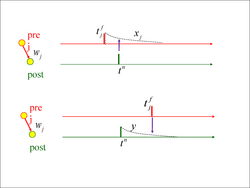
http://www.scholarpedia.org/article/Spike-timing_dependent_plasticity

In [12]:
%load_ext autoreload
%autoreload 2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Running on: {}'.format(device))

batch_size=1

total_time = 100

rate = 100

dataset = PoissonDataloader(rates=[rate for x in range(40)], total_timesteps=total_time, dataset_size=batch_size, device='cpu')

test_loader = DataLoader(dataset, batch_size=batch_size)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running on: cuda:0


In [13]:
snn = SNN_STDP('custom', structure=(10,1), tau_m='normal', win=total_time, loss_fn='sum', debug=True,
               batch_size=batch_size, device='cpu')
snn

[INFO] Delays: tensor([0])


SNN_STDP(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=40, out_features=10, bias=False)
  (f1_o): Linear(in_features=10, out_features=1, bias=False)
)

Without stdp

In [14]:
snn.stdp_scale = 0.0
snn.stdp_alpha = 0.7

<AxesSubplot: xlabel='input', ylabel='output'>

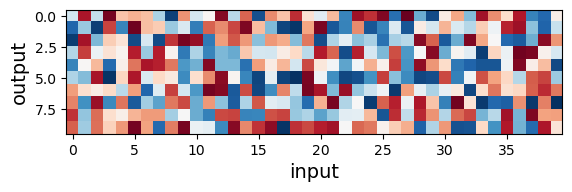

In [15]:
from hwsnn.utils.visualization_utils import plot_param
plot_param(snn.f0_i, mode='2D')

In [16]:
propagate_batch(snn, test_loader)

<AxesSubplot: xlabel='input', ylabel='output'>

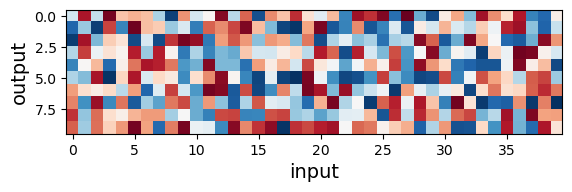

In [17]:
plot_param(snn.f0_i, mode='2D')

<AxesSubplot: xlabel='Time (ms)', ylabel='Neuron'>

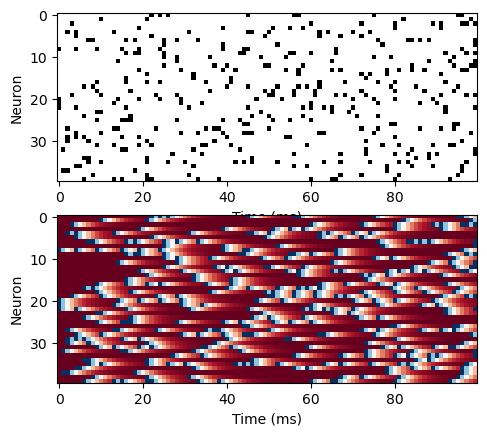

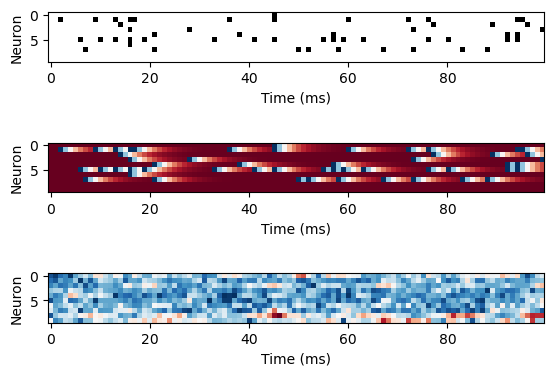

In [18]:
from hwsnn.utils.visualization_utils import plot_raster
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(211)
plot_raster(snn, 'input', 1, mode='spikes')
plt.subplot(212)
plot_raster(snn, 'input', 1, mode='traces')

plt.figure()
plt.subplot(311)
plot_raster(snn, 'f1', 1, mode='spikes')
plt.subplot(312)
plot_raster(snn, 'f1', 1, mode='traces')
plt.subplot(313)
plot_raster(snn, 'f1', 1, mode='mems')

With stdp

In [19]:
snn.stdp_scale = 0.01
snn.stdp_alpha = 0.7

<AxesSubplot: xlabel='input', ylabel='output'>

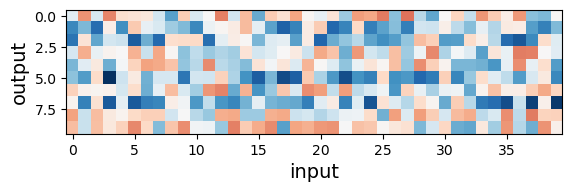

In [20]:
propagate_batch(snn, test_loader)
plot_param(snn.f0_i, mode='2D')

<AxesSubplot: xlabel='Time (ms)', ylabel='Neuron'>

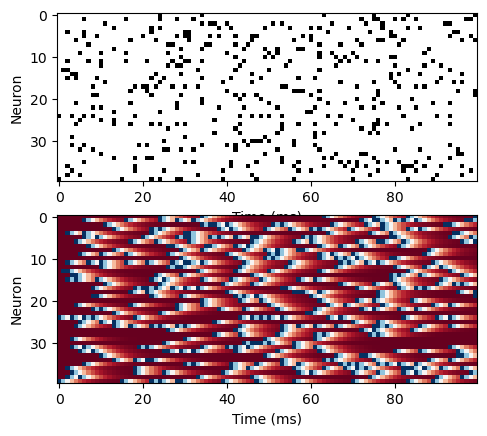

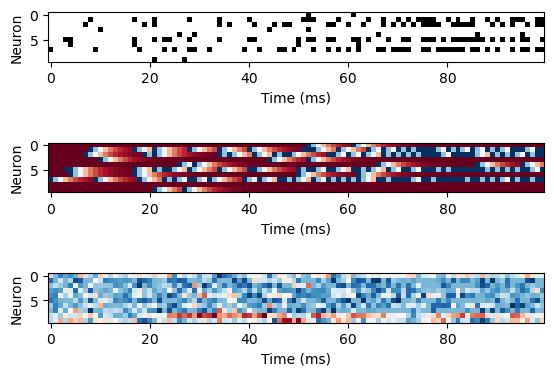

In [21]:
from hwsnn.utils.visualization_utils import plot_raster
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(211)
plot_raster(snn, 'input', 1, mode='spikes')
plt.subplot(212)
plot_raster(snn, 'input', 1, mode='traces')

plt.figure()
plt.subplot(311)
plot_raster(snn, 'f1', 1, mode='spikes')
plt.subplot(312)
plot_raster(snn, 'f1', 1, mode='traces')
plt.subplot(313)
plot_raster(snn, 'f1', 1, mode='mems')